# 스케일링(Scaling)
- 특정 알고리즘은 데이터의 스케일(관측 범위)에 많은 영향이 있어 관측 범위를 일정하게 맞춤
- **Standardization(표준화)**, **Normalization(정규화)** 방법이 존재

In [1]:
# 스케일링을 적용할 데이터 불러오기
import pandas as pd
df = pd.read_csv('/mnt/elice/dataset/iris.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
df.columns[:-1].tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# 스케일링 적용을 위한 특성 데이터 추출
features = [ 
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)'
] # 제외할 컬럼은 주석처리
X = df[features]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## 정규화
- `sklearn.preprocessing.MinMaxScaler`
- 서로 다른 특징 값을 같은 범위로 통일 시키기 위해 사용하는 방법
- 최소 최대 정규화를 많이 이용하며 0~1 사이로 데이터를 변환

In [4]:
# 1. 전체 변환
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # 스케일러 생성
X_Sclaed = scaler.fit_transform(X) # 앞으로 새롭게 들어올 데이터가 없는 경우 전체 transform하는 경우가 많음

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(X)

In [6]:
# 2.부분 변환
scaler = MinMaxScaler() # 스케일러 생성
x_train_scaled = scaler.fit_transform(x_train) # fit_transform -> 각 컬럼별로 최댓값과 최솟값을 이용하여 scaling 
x_test_scaled = scaler.transform(x_test) # 변환만 수행 (fit_transform을 쓰면 x_test의 최댓값과 최솟값을 사용하여 scaling하기 때문에 학습데이터와 평가데이터 사이의 값들이 서로 일치하지 않을 수 있다.)

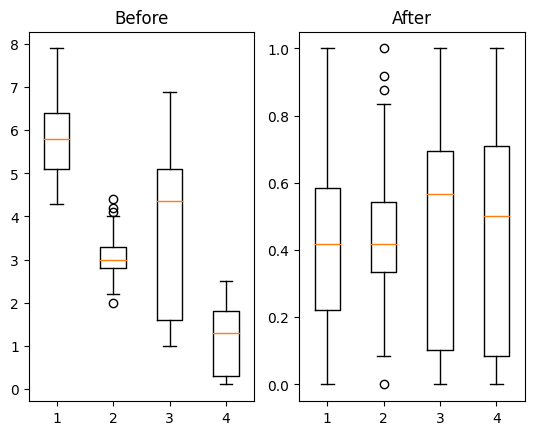

In [7]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.boxplot(X)
plt.title('Before')
plt.subplot(1, 2, 2)
plt.boxplot(X_Sclaed)
plt.title('After')
plt.savefig('정규화 결과')
plt.show()

## 표준화
- `sklearn.preprocessing.StandardScaler`
- 서로 다른 분포를 비교하기 위해 표준에 맞게 통일 시키는 방법
- 평균을 0, 표준 편차를 1로 변환

In [8]:
# 1. 전체 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # 스케일러 생성
X_Sclaed = scaler.fit_transform(X)

In [9]:
# 2.부분 변환
scaler = StandardScaler() # 스케일러 생성
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) # 변환만 수행

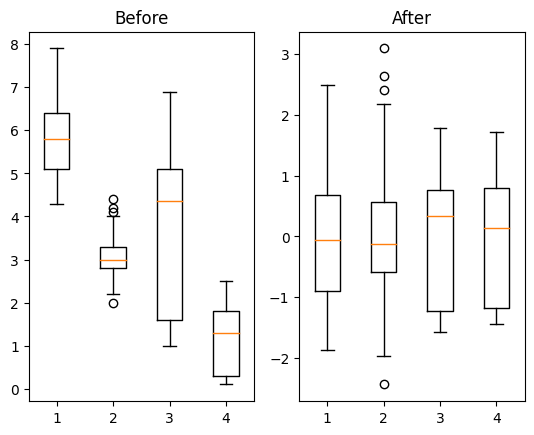

In [10]:
import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
plt.boxplot(X)
plt.title('Before')
plt.subplot(1, 2, 2)
plt.boxplot(X_Sclaed)
plt.title('After')
plt.savefig('표준화 결과')
plt.show()

In [11]:
# 변환 결과 확인
x_train_scaled

array([[ 1.06088962,  0.05200208,  0.57021935,  0.43530721],
       [ 1.30437248,  0.05200208,  0.7970917 ,  1.48378908],
       [ 1.54785535, -0.17200688,  1.2508364 ,  1.22166861],
       [ 0.57392389,  0.50002   ,  1.30755448,  1.74590955],
       [ 1.06088962,  0.50002   ,  1.13740022,  1.74590955],
       [ 0.81740676, -0.6200248 ,  0.51350126,  0.43530721],
       [-0.88697329,  1.6200648 , -1.18804137, -1.26847584],
       [-1.73916331, -0.39601584, -1.30147755, -1.26847584],
       [-0.88697329,  0.72402896, -1.24475946, -1.26847584],
       [ 1.66959678,  1.17204688,  1.36427257,  1.74590955],
       [ 0.57392389, -0.6200248 ,  0.7970917 ,  0.43530721],
       [ 2.27830394, -1.06804272,  1.81801727,  1.48378908],
       [-0.03478327, -0.84403376,  0.22991082, -0.21999396],
       [-0.40000756, -1.06804272,  0.40006508,  0.0421265 ],
       [ 0.33044103, -0.6200248 ,  0.57021935,  0.0421265 ],
       [-0.27826613, -0.6200248 ,  0.68365552,  1.09060838],
       [-0.03478327,  2.

In [12]:
# 역변환 결과 확인
scaler.inverse_transform(x_train_scaled)

array([[6.7, 3.1, 4.7, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 3.3, 6. , 2.5],
       [6.7, 3.3, 5.7, 2.5],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [6.3, 2.8, 5.1, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 2.8, 4.7, 1.2],
       [5.6, 2.8, 4.9, 2. ],
       [5.8, 4. , 1.2, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 2.9, 5.6, 1.8],
       [5.5, 2.4, 3.7, 1. ],
       [6.4, 3.1, 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [6.1, 2.8, 4. , 1.3],
       [5. , 3.5, 1.6, 0.6],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 2.5, 5.8, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [5.1, 3.8, 1.5, 0.3],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3

In [13]:
# 원본과 비교
x_train.values

array([[6.7, 3.1, 4.7, 1.5],
       [6.9, 3.1, 5.1, 2.3],
       [7.1, 3. , 5.9, 2.1],
       [6.3, 3.3, 6. , 2.5],
       [6.7, 3.3, 5.7, 2.5],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 3.8, 1.6, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [6.3, 2.8, 5.1, 1.5],
       [7.7, 2.6, 6.9, 2.3],
       [5.8, 2.7, 4.1, 1. ],
       [5.5, 2.6, 4.4, 1.2],
       [6.1, 2.8, 4.7, 1.2],
       [5.6, 2.8, 4.9, 2. ],
       [5.8, 4. , 1.2, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [5.8, 2.8, 5.1, 2.4],
       [6.3, 2.9, 5.6, 1.8],
       [5.5, 2.4, 3.7, 1. ],
       [6.4, 3.1, 5.5, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [6.5, 3.2, 5.1, 2. ],
       [6.2, 3.4, 5.4, 2.3],
       [6.1, 2.8, 4. , 1.3],
       [5. , 3.5, 1.6, 0.6],
       [7.6, 3. , 6.6, 2.1],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 2.5, 5.8, 1.8],
       [6.5, 3. , 5.8, 2.2],
       [5.1, 3.8, 1.5, 0.3],
       [6. , 3.4, 4.5, 1.6],
       [6.7, 3

## 제출

제출을 위해 학습과 테스트 데이터로 분리된 `iris.csv` 데이터에서 학습 데이터 및 테스트 데이터에 **표준화**를 수행한 결과를 각각 `result_train`과 `result_test`에 저장합니다.
- 표준화를 수행할 때 테스트 데이터에는 변환만 수행해야 하는 점 유의하세요.

In [16]:
df = pd.read_csv('/mnt/elice/dataset/iris.csv')

# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

features = [ 
    'sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)'
]
X = df[features]
x_train, x_test = train_test_split(X, random_state=SEED)

# TODO: 표준화를 수행합니다.
scaler = StandardScaler()
result_train = scaler.fit_transform(x_train)
result_test = scaler.transform(x_test)

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [17]:
import os
import json
import numpy as np

assert isinstance(result_train, np.ndarray), \
    "'result_train' 변수에 numpy array를 저장했는지 확인하세요."
assert isinstance(result_test, np.ndarray), \
    "'result_test' 변수에 numpy array를 저장했는지 확인하세요."

result = {
    "problem_1": {"mean": np.mean(result_train), "std": np.std(result_train)},
    "problem_2": {"mean": np.mean(result_test), "std": np.std(result_test)},
}

with open('result.json', 'w') as f:
    json.dump(result, f)

os.system('elice_grade result.json cds_ai_exercise.ipynb')

send files ['result.json', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 2.774 seconds
=== Message ===
[ 1번] 정답! (+50점)
[ 2번] 정답! (+50점)

제출 완료되었습니다.


0